In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sympy as sp
from scipy.stats import binom
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12


In [2]:
print('### problem 1: turing machine simulation ###\n')

class TuringMachine:
    def __init__(self, states, symbols, instructions, initial_state, final_state, start_symbol='▷', blank_symbol='∅'):
        self.states = set(states)
        self.symbols = set(symbols)
        self.instructions = instructions
        self.initial_state = initial_state
        self.final_state = final_state
        self.start_symbol = start_symbol
        self.blank_symbol = blank_symbol
        self.tape = []
        self.head_pos = 0
        self.current_state = self.initial_state
        self.step_count = 0

    def load_tape(self, input_string):
        self.tape = [self.start_symbol] + list(input_string)
        self.head_pos = 0
        self.current_state = self.initial_state
        self.step_count = 0

    def _extend_tape_if_needed(self):
        if self.head_pos >= len(self.tape):
            self.tape.append(self.blank_symbol)

    def run(self, max_steps=100, verbose=True):
        if verbose:
            print('initial tape:', ''.join(self.tape))
            print('-'*40)
        while self.current_state!= self.final_state and self.step_count < max_steps:
            self._extend_tape_if_needed()
            key = (self.current_state, self.tape[self.head_pos])
            if key not in self.instructions:
                print(f'error: no instruction for {key}, halting')
                break
            new_state, write_symbol, move = self.instructions[key]
            if verbose:
                print(f'step {self.step_count}: state={self.current_state}, head={self.head_pos}, read={self.tape[self.head_pos]}')
            self.tape[self.head_pos] = write_symbol
            self.current_state = new_state
            if move == 'R':
                self.head_pos += 1
            if verbose:
                tape_str = ''.join(self.tape)
                # Fix: handle head position out of bounds
                if self.head_pos < len(tape_str):
                    viz = tape_str[:self.head_pos] + '['+tape_str[self.head_pos]+']' + tape_str[self.head_pos+1:]
                else:
                    viz = tape_str + '['+self.blank_symbol+']'
                print('tape:', viz)
                print('-'*40)
            self.step_count += 1
        print('halt' if self.current_state==self.final_state else 'stopped', 'after', self.step_count, 'steps')
        return ''.join(self.tape)

states = ['S','I','II','F']
symbols = ['▷','0','1','∅']
instructions = {
    ('S','▷'):('I','▷','R'),
    ('I','0'):('I','0','R'),
    ('I','1'):('II','0','R'),
    ('II','0'):('I','1','R'),
    ('II','1'):('II','1','R'),
    ('II','∅'):('I','1','R'),
    ('I','∅'):('F','∅','R')
}

tm = TuringMachine(states, symbols, instructions, 'S','F')
print('--- tape1 ---'); tm.load_tape('01'); tm.run()
print('\n--- tape2 ---'); tm.load_tape('101'); tm.run()


### problem 1: turing machine simulation ###

--- tape1 ---
initial tape: ▷01
----------------------------------------
step 0: state=S, head=0, read=▷
tape: ▷[0]1
----------------------------------------
step 1: state=I, head=1, read=0
tape: ▷0[1]
----------------------------------------
step 2: state=I, head=2, read=1
tape: ▷00[∅]
----------------------------------------
step 3: state=II, head=3, read=∅
tape: ▷001[∅]
----------------------------------------
step 4: state=I, head=4, read=∅
tape: ▷001∅[∅]
----------------------------------------
halt after 5 steps

--- tape2 ---
initial tape: ▷101
----------------------------------------
step 0: state=S, head=0, read=▷
tape: ▷[1]01
----------------------------------------
step 1: state=I, head=1, read=1
tape: ▷0[0]1
----------------------------------------
step 2: state=II, head=2, read=0
tape: ▷01[1]
----------------------------------------
step 3: state=I, head=3, read=1
tape: ▷010[∅]
----------------------------------------
step 4: s

'▷0101∅'

### problem 2: binomial distribution ###



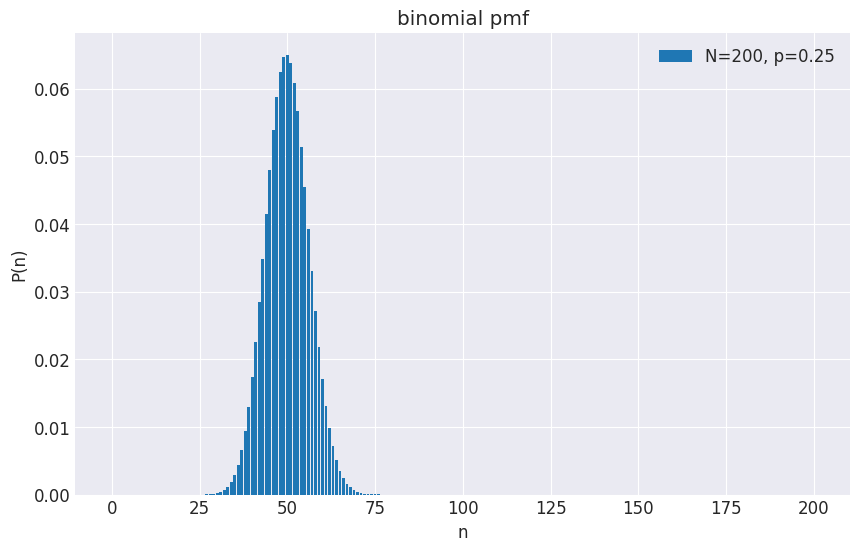

In [7]:
print('### problem 2: binomial distribution ###\n')

N,p = 200,0.25
n_values = np.arange(0,N+1)
pmf = binom.pmf(n_values,N,p)

plt.bar(n_values, pmf, label=f'N={N}, p={p}')
plt.title('binomial pmf')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.legend()
plt.show()


### problem 3: entropy maximization ###

critical point: [1/2]


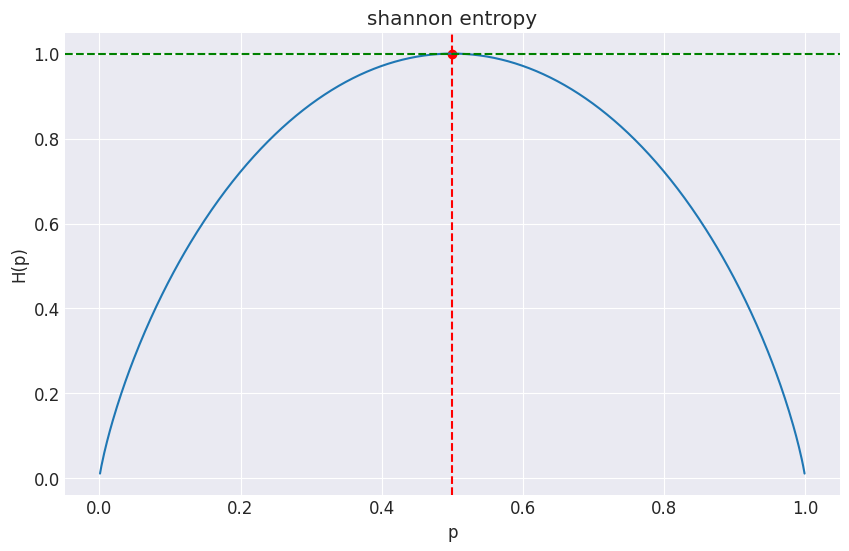

In [4]:
print('### problem 3: entropy maximization ###\n')

p = sp.Symbol('p')
H = -(p*sp.log(p)+(1-p)*sp.log(1-p))
H_prime = sp.diff(H,p)
p_max = sp.solve(H_prime,p)
print('critical point:', p_max)

p_vals = np.linspace(0.001,0.999,500)
H_vals = -(p_vals*np.log2(p_vals)+(1-p_vals)*np.log2(1-p_vals))
H_max_val = -(float(p_max[0])*np.log2(float(p_max[0]))+(1-float(p_max[0]))*np.log2(1-float(p_max[0])))

plt.plot(p_vals,H_vals)
plt.axvline(p_max[0],color='r',ls='--')
plt.axhline(H_max_val,color='g',ls='--')
plt.scatter(p_max[0],H_max_val,color='r')
plt.title('shannon entropy')
plt.xlabel('p')
plt.ylabel('H(p)')
plt.show()


In [8]:
display('sorry was short; did last minute lol')

'sorry was short; did last minute lol'